# FastAI Experiments

In [5]:
from fastai.tabular import *
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import os
import sys
import glob
from sklearn.utils import shuffle

## Download datasets
- if zip dataset files already exists; no download is done
- force unzip all the .zip files

In [3]:
%%bash
URL=https://iscxdownloads.cs.unb.ca/iscxdownloads/ISCX-URL-2016/
FILES=(ISCXURL2016.zip) 
for FILE in ${FILES[*]}; do
    if [ ! -f "$FILE" ]; then
        printf "downloading %s\n" $FILE
        curl -O $URL$FILE
        # unzip files
        echo 'unzipping ' $FILE
        unzip -o $FILE #overwrite exiting files/folders if exists
    fi
done

downloading ISCXURL2016.zip
unzipping  ISCXURL2016.zip
Archive:  ISCXURL2016.zip
   creating: FinalDataset/
  inflating: FinalDataset/Spam_Infogain_test.csv  
  inflating: FinalDataset/Spam_Infogain.csv  
  inflating: FinalDataset/Spam_BestFirst_test.csv  
  inflating: FinalDataset/Spam_BestFirst.csv  
  inflating: FinalDataset/Spam.csv   
  inflating: FinalDataset/Phishing_Infogain_test.csv  
  inflating: FinalDataset/Phishing_Infogain.csv  
  inflating: FinalDataset/Phishing.csv  
  inflating: FinalDataset/Malware_Infogain_test.csv  
  inflating: FinalDataset/Malware_Infogain.csv  
  inflating: FinalDataset/Malware_BestFirst.csv  
  inflating: FinalDataset/Malware.csv  
  inflating: FinalDataset/Defacement_Infogain_test.csv  
  inflating: FinalDataset/Defacement_Infogain.csv  
  inflating: FinalDataset/Defacement_BestFirst.csv  
  inflating: FinalDataset/Defacement.csv  
  inflating: FinalDataset/All_Infogain_test.csv  
  inflating: FinalDataset/All_Infogain.csv  
  inflating: FinalD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10.6M  100 10.6M    0     0  3609k      0  0:00:03  0:00:03 --:--:-- 3611k


## Check CSV files inside FinalDataset folder

In [4]:
! ls FinalDataset

All.csv                      Malware_Infogain_test.csv
All_BestFirst.csv            Phishing.csv
All_BestFirst_test.csv       Phishing_BestFirst.csv
All_Infogain.csv             Phishing_Infogain.csv
All_Infogain_test.csv        Phishing_Infogain_test.csv
Defacement.csv               Spam.csv
Defacement_BestFirst.csv     Spam_BestFirst.csv
Defacement_Infogain.csv      Spam_BestFirst_test.csv
Defacement_Infogain_test.csv Spam_Infogain.csv
Malware.csv                  Spam_Infogain_test.csv
Malware_BestFirst.csv        URL
Malware_Infogain.csv


## Analyze FinalDataset/All.csv file

In [7]:
df = pd.read_csv('FinalDataset/All.csv')

/Users/rbasnet/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df.dtypes

Querylength                          int64
domain_token_count                   int64
path_token_count                     int64
avgdomaintokenlen                  float64
longdomaintokenlen                   int64
avgpathtokenlen                    float64
tld                                  int64
charcompvowels                       int64
charcompace                          int64
ldl_url                              int64
ldl_domain                           int64
ldl_path                             int64
ldl_filename                         int64
ldl_getArg                           int64
dld_url                              int64
dld_domain                           int64
dld_path                             int64
dld_filename                         int64
dld_getArg                           int64
urlLen                               int64
domainlength                         int64
pathLength                           int64
subDirLen                            int64
fileNameLen

In [9]:
df.columns

Index(['Querylength', 'domain_token_count', 'path_token_count',
       'avgdomaintokenlen', 'longdomaintokenlen', 'avgpathtokenlen', 'tld',
       'charcompvowels', 'charcompace', 'ldl_url', 'ldl_domain', 'ldl_path',
       'ldl_filename', 'ldl_getArg', 'dld_url', 'dld_domain', 'dld_path',
       'dld_filename', 'dld_getArg', 'urlLen', 'domainlength', 'pathLength',
       'subDirLen', 'fileNameLen', 'this.fileExtLen', 'ArgLen', 'pathurlRatio',
       'ArgUrlRatio', 'argDomanRatio', 'domainUrlRatio', 'pathDomainRatio',
       'argPathRatio', 'executable', 'isPortEighty', 'NumberofDotsinURL',
       'ISIpAddressInDomainName', 'CharacterContinuityRate',
       'LongestVariableValue', 'URL_DigitCount', 'host_DigitCount',
       'Directory_DigitCount', 'File_name_DigitCount', 'Extension_DigitCount',
       'Query_DigitCount', 'URL_Letter_Count', 'host_letter_count',
       'Directory_LetterCount', 'Filename_LetterCount',
       'Extension_LetterCount', 'Query_LetterCount', 'LongestPathToken

In [10]:
df.shape

(36707, 80)

In [11]:
df.head()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.5,14,4.400000,4,8,3,0,...,1,0,-1,0.726298,0.784493,0.894886,0.850608,NaN,-1.0,Defacement
1,0,4,5,5.5,14,6.000000,4,12,4,0,...,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.0,-1.0,Defacement
2,0,4,5,5.5,14,5.800000,4,12,5,0,...,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.0,-1.0,Defacement
3,0,4,12,5.5,14,5.500000,4,32,16,0,...,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.0,-1.0,Defacement
4,0,4,6,5.5,14,7.333334,4,18,11,0,...,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.0,-1.0,Defacement


In [12]:
df.tail()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
36702,29,4,14,5.750000,12,3.666667,4,20,24,3,...,3,2,7,0.690555,0.791265,0.777498,0.690227,0.656684,0.796205,spam
36703,0,4,13,3.750000,8,8.461538,4,24,23,0,...,16,15,-1,0.665492,0.820010,0.879588,0.674400,0.674671,-1.000000,spam
36704,58,3,27,6.666666,16,3.375000,3,41,34,20,...,8,7,9,0.656807,0.801139,0.684777,0.713622,0.717187,0.705245,spam
36705,35,3,13,4.333334,9,3.600000,3,15,13,7,...,9,8,3,0.725963,0.897617,0.871049,0.745932,0.758824,0.790772,spam
36706,40,3,25,6.666666,16,3.250000,3,35,31,19,...,7,6,7,0.674351,0.801139,0.697282,0.730563,0.731481,0.769238,spam


## Clean Data
- dropped samples with Infinity values
- dropped samples with NaN values

In [41]:
def loadData(csvFile):
    pickleDump = '{}.pickle'.format(csvFile)
    if os.path.exists(pickleDump):
        df = pd.read_pickle(pickleDump)
    else:
        df = pd.read_csv(csvFile, low_memory=False)
        # clean data
        # strip the whitspaces from column names
        df = df.rename(str.strip, axis='columns')
        #df.drop(columns=[], inplace=True)
        # drop missing values/NaN etc.
        df.dropna(inplace=True)
        # drop Infinity rows and NaN string from each column
        for col in df.columns:
            indexNames = df[df[col]=='Infinity'].index
            if not indexNames.empty:
                print('deleting {} rows with Infinity in column {}'.format(len(indexNames), col))
                df.drop(indexNames, inplace=True)
            indexNames = df[df[col]=='NaN'].index
            if not indexNames.empty:
                print('deleting {} rows with NaN in column {}'.format(len(indexNames), col))
                df.drop(indexNames, inplace=True)
        
        df.to_pickle(pickleDump)
    
    return df

## Test loadData function

In [53]:
df1 = loadData('FinalDataset/All.csv')

In [54]:
df1.columns

Index(['Querylength', 'domain_token_count', 'path_token_count',
       'avgdomaintokenlen', 'longdomaintokenlen', 'avgpathtokenlen', 'tld',
       'charcompvowels', 'charcompace', 'ldl_url', 'ldl_domain', 'ldl_path',
       'ldl_filename', 'ldl_getArg', 'dld_url', 'dld_domain', 'dld_path',
       'dld_filename', 'dld_getArg', 'urlLen', 'domainlength', 'pathLength',
       'subDirLen', 'fileNameLen', 'this.fileExtLen', 'ArgLen', 'pathurlRatio',
       'ArgUrlRatio', 'argDomanRatio', 'domainUrlRatio', 'pathDomainRatio',
       'argPathRatio', 'executable', 'isPortEighty', 'NumberofDotsinURL',
       'ISIpAddressInDomainName', 'CharacterContinuityRate',
       'LongestVariableValue', 'URL_DigitCount', 'host_DigitCount',
       'Directory_DigitCount', 'File_name_DigitCount', 'Extension_DigitCount',
       'Query_DigitCount', 'URL_Letter_Count', 'host_letter_count',
       'Directory_LetterCount', 'Filename_LetterCount',
       'Extension_LetterCount', 'Query_LetterCount', 'LongestPathToken

In [55]:
df1.shape

(18982, 80)

In [56]:
df1['NumberRate_Extension'][:10]

35    0.000000
37    0.078431
38    0.096154
39    0.078431
40    0.096154
41    0.078431
42    0.096154
43    0.096154
44    0.096154
47    0.000000
Name: NumberRate_Extension, dtype: float64

In [57]:
df1.shape

(18982, 80)

In [58]:
df1.head()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
35,0,4,4,6.25,17,3.75,4,4,2,0,...,1,0,-1,0.726945,0.768811,0.916667,1.000000,1.000000,-1.000000,Defacement
37,22,4,10,6.25,17,3.50,4,19,10,0,...,9,8,7,0.686486,0.768811,0.916667,0.748105,0.757206,0.749167,Defacement
38,23,4,10,6.25,17,3.50,4,19,10,0,...,9,8,7,0.687286,0.768811,0.916667,0.747622,0.756298,0.748268,Defacement
39,22,4,10,6.25,17,3.50,4,19,10,0,...,9,8,7,0.683476,0.768811,0.916667,0.742090,0.750292,0.741506,Defacement
40,23,4,10,6.25,17,3.50,4,19,10,0,...,9,8,7,0.687286,0.768811,0.916667,0.747622,0.756298,0.748268,Defacement


## Experimenting with FinalDataset/All.csv

## Total samples for each type

In [91]:
# total samples
label = 'URL_Type_obf_Type'
lblTypes = set(df[label])
for lbl in lblTypes:
    print('| {} | {} |'.format(lbl, len(df1[df1[label] == lbl].index)))

| spam | 5342 |
| phishing | 4014 |
| Defacement | 2477 |
| benign | 2709 |
| malware | 4440 |


In [67]:
dataPath = 'FinalDataset'
dep_var = label
cat_names = []
cont_names = list(set(df.columns) - set(cat_names) - set([dep_var]))

In [68]:
cont_names

['File_name_DigitCount',
 'dld_domain',
 'SymbolCount_Directoryname',
 'pathurlRatio',
 'Query_LetterCount',
 'pathLength',
 'isPortEighty',
 'NumberRate_AfterPath',
 'Entropy_Afterpath',
 'pathDomainRatio',
 'avgdomaintokenlen',
 'avgpathtokenlen',
 'NumberRate_Domain',
 'urlLen',
 'Filename_LetterCount',
 'Entropy_Domain',
 'Entropy_URL',
 'delimeter_Count',
 'Extension_LetterCount',
 'domainlength',
 'Entropy_DirectoryName',
 'URL_Letter_Count',
 'URL_DigitCount',
 'longdomaintokenlen',
 'delimeter_path',
 'ldl_path',
 'Extension_DigitCount',
 'sub-Directory_LongestWordLength',
 'URLQueries_variable',
 'ArgLen',
 'spcharUrl',
 'host_letter_count',
 'LongestVariableValue',
 'this.fileExtLen',
 'ldl_getArg',
 'ArgUrlRatio',
 'CharacterContinuityRate',
 'SymbolCount_Afterpath',
 'SymbolCount_URL',
 'executable',
 'path_token_count',
 'dld_url',
 'Entropy_Filename',
 'ldl_filename',
 'NumberRate_Extension',
 'URL_sensitiveWord',
 'ldl_domain',
 'dld_path',
 'subDirLen',
 'NumberRate_URL

In [65]:
df1['argPathRatio']

35        0.11111111
37        0.72307694
38        0.72727275
39        0.72307694
40        0.72727275
41        0.72307694
42        0.72727275
43        0.72727275
44        0.72727275
47        0.15384616
185      0.054054055
259       0.89215684
341              0.9
378            0.912
446        0.8804348
482       0.09090909
484      0.048780486
485      0.074074075
486       0.10526316
487       0.06451613
488       0.09090909
489      0.027027028
490             0.08
491       0.05882353
492      0.051282052
493       0.06451613
494      0.055555556
495      0.054054055
496      0.055555556
497      0.031746034
            ...     
36673     0.20833333
36674     0.08695652
36675       0.704918
36676     0.63829786
36677      0.7925926
36678     0.76363635
36679      0.7941176
36680       0.015625
36683      0.6626506
36684            0.1
36686    0.036363635
36688     0.12941177
36689      0.7126437
36690     0.78504676
36691     0.08695652
36692           0.04
36693     0.0

In [70]:
procs = [FillMissing, Categorify]
sss = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=0)
print(sss)

StratifiedShuffleSplit(n_splits=1, random_state=0, test_size=0.2,
            train_size=None)


epoch,train_loss,valid_loss,accuracy,time
0,0.615579,0.453709,0.864103,00:02
1,0.327848,0.294684,0.901238,00:02
2,0.284682,0.244401,0.917303,00:02
3,0.242101,0.210762,0.930998,00:02
4,0.191809,0.167853,0.941796,00:02
5,0.162793,0.144203,0.951541,00:02
6,0.136644,0.118894,0.960495,00:02
7,0.113278,0.110737,0.964972,00:02
8,0.095909,0.100789,0.967606,00:02
9,0.092563,0.098492,0.968923,00:02


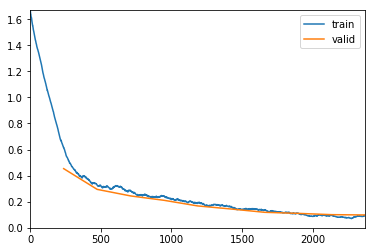

In [78]:
for train_idx, test_idx in sss.split(df1.index, df1[dep_var]):
    data_fold = (TabularList.from_df(df1, path=dataPath, cat_names=cat_names, cont_names=cont_names, procs=procs)
                     .split_by_idxs(train_idx, test_idx)
                     .label_from_df(cols=dep_var)
                     .databunch())
    # create model and learn
    model = tabular_learner(data_fold, layers=[200, 100], metrics=accuracy, callback_fns=ShowGraph)
    model.fit_one_cycle(cyc_len=10) #

In [79]:
model.save('{}.model'.format(os.path.basename(dataPath)))

In [80]:
loss, acc = model.validate()
print('loss {}: accuracy: {:.2f}%'.format(loss, acc*100))

loss 0.09849186986684799: accuracy: 96.89%


In [81]:
preds, y, losses = model.get_preds(with_loss=True)
interp = ClassificationInterpretation(model, preds, y, losses)

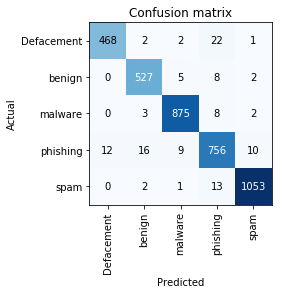

In [82]:
interp.plot_confusion_matrix(slice_size=10)

In [83]:
print(interp.confusion_matrix())

[[ 468    2    2   22    1]
 [   0  527    5    8    2]
 [   0    3  875    8    2]
 [  12   16    9  756   10]
 [   0    2    1   13 1053]]


In [84]:
interp.most_confused()

[('Defacement', 'phishing', 22),
 ('phishing', 'benign', 16),
 ('spam', 'phishing', 13),
 ('phishing', 'Defacement', 12),
 ('phishing', 'spam', 10),
 ('phishing', 'malware', 9),
 ('benign', 'phishing', 8),
 ('malware', 'phishing', 8),
 ('benign', 'malware', 5),
 ('malware', 'benign', 3),
 ('Defacement', 'benign', 2),
 ('Defacement', 'malware', 2),
 ('benign', 'spam', 2),
 ('malware', 'spam', 2),
 ('spam', 'benign', 2),
 ('Defacement', 'spam', 1),
 ('spam', 'malware', 1)]

## Binary-class classification
- Label all malicious types as 1
- Label benign type as 0

In [92]:
lblTypes = list(lblTypes)
#lblTypes.remove('benign')
lblTypes

['spam', 'phishing', 'Defacement', 'benign', 'malware']

In [94]:
lblTypes = dict(zip(lblTypes, [1, 1, 1, 1, 1]))
lblTypes['benign'] = 0
lblTypes

{'spam': 1, 'phishing': 1, 'Defacement': 1, 'benign': 0, 'malware': 1}

In [96]:
df1[label] = df1[label].map(lblTypes)

In [98]:
df1.tail()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
36702,29,4,14,5.750000,12,3.666667,4,20,24,3,...,3,2,7,0.690555,0.791265,0.777498,0.690227,0.656684,0.796205,1
36703,0,4,13,3.750000,8,8.461538,4,24,23,0,...,16,15,-1,0.665492,0.820010,0.879588,0.674400,0.674671,-1.000000,1
36704,58,3,27,6.666666,16,3.375000,3,41,34,20,...,8,7,9,0.656807,0.801139,0.684777,0.713622,0.717187,0.705245,1
36705,35,3,13,4.333334,9,3.600000,3,15,13,7,...,9,8,3,0.725963,0.897617,0.871049,0.745932,0.758824,0.790772,1
36706,40,3,25,6.666666,16,3.250000,3,35,31,19,...,7,6,7,0.674351,0.801139,0.697282,0.730563,0.731481,0.769238,1


## Experiment with Malware.csv Dataset

epoch,train_loss,valid_loss,accuracy,time
0,0.275756,0.176440,0.958388,00:02
1,0.109186,0.093853,0.961812,00:02
2,0.092497,0.078733,0.971820,00:02
3,0.077834,0.066830,0.977877,00:02
4,0.067232,0.054377,0.984461,00:02
5,0.052324,0.063390,0.977351,00:02
6,0.042118,0.041974,0.986305,00:02
7,0.035664,0.039983,0.987622,00:02
8,0.026916,0.039694,0.987622,00:02
9,0.026807,0.041107,0.987095,00:02


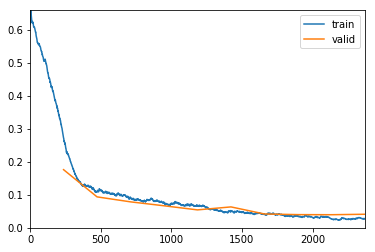

In [101]:
for train_idx, test_idx in sss.split(df1.index, df1[dep_var]):
    data_fold = (TabularList.from_df(df1, path=dataPath, cat_names=cat_names, cont_names=cont_names, procs=procs)
                     .split_by_idxs(train_idx, test_idx)
                     .label_from_df(cols=dep_var)
                     .databunch())
    # create model and learn
    model = tabular_learner(data_fold, layers=[200, 100], metrics=accuracy, callback_fns=ShowGraph)
    model.fit_one_cycle(cyc_len=10)

In [102]:
loss, acc = model.validate()
print('loss {}: accuracy: {:.2f}%'.format(loss, acc*100))

loss 0.041107263416051865: accuracy: 98.71%


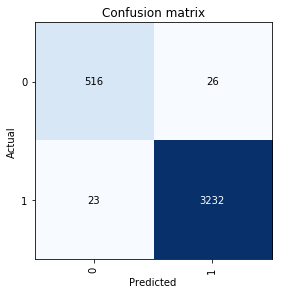

In [103]:
preds, y, losses = model.get_preds(with_loss=True)
interp = ClassificationInterpretation(model, preds, y, losses)
interp.plot_confusion_matrix(slice_size=10)